# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

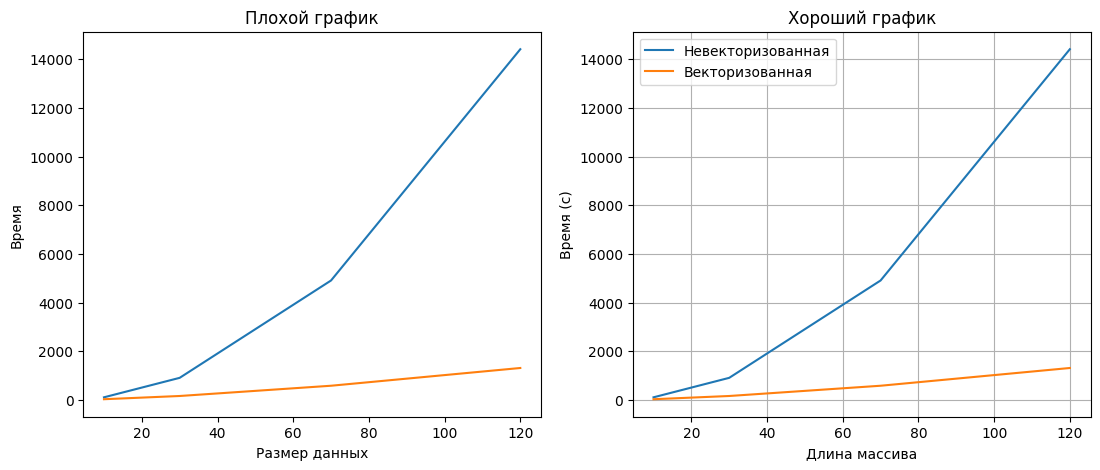

In [49]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()
            

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

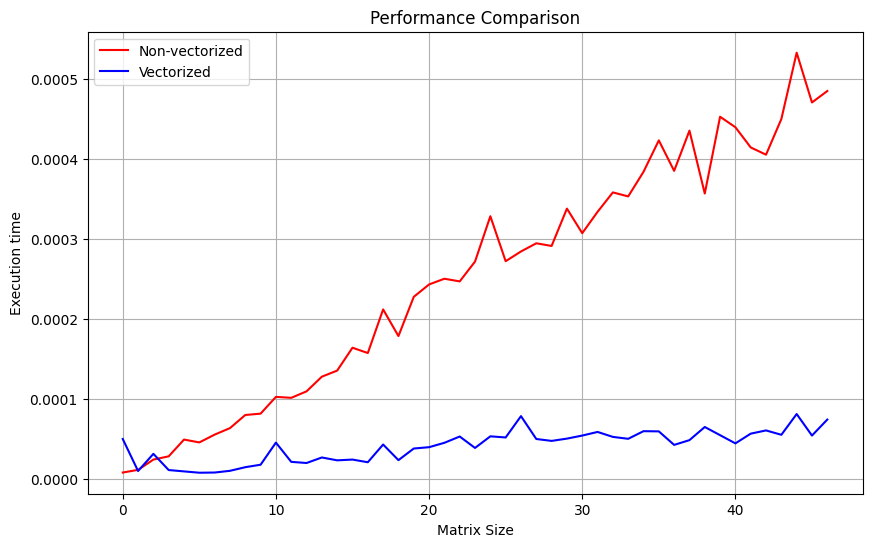

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized
%matplotlib inline
size = 1400
non_vec = []
vec = []

for ms in range(1, size+1, 30):
    testx = np.random.rand(ms, ms)
    
    f1 = functions.prod_non_zero_diag
    f2 = functions_vectorized.prod_non_zero_diag
    
    time_beg = time.time()
    f1(testx)
    time_end = time.time()
    non_vec.append(time_end - time_beg)

    time_beg = time.time()
    f2(testx)
    time_end = time.time()
    
    vec.append(time_end - time_beg)
plt.figure(figsize=(10, 6))
plt.plot(non_vec, label="Non-vectorized", color='red')

plt.plot(vec, label="Vectorized", color='blue')

plt.xlabel("Matrix Size")
plt.ylabel("Execution time")
plt.title("Performance Comparison")
plt.legend()  
plt.grid(True)  


plt.show()


 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


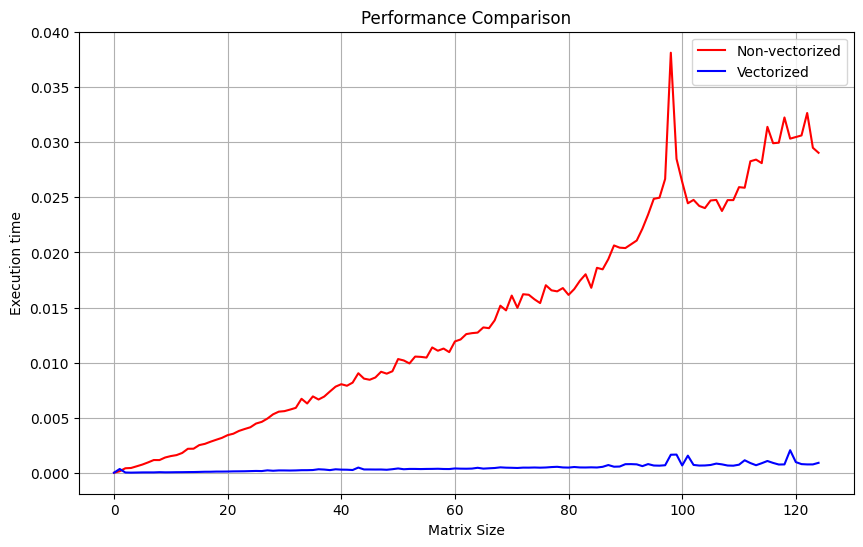

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized
%matplotlib inline
size = 50000
non_vec = []
vec = []

for ms in range(1, size+1, 400):
    testx = np.random.rand(ms)
    testy = np.random.rand(ms)
    testx_copy = testx.copy()
    testy_copy =testy.copy()
    

    f1 = functions.are_multisets_equal
    f2 = functions_vectorized.are_multisets_equal
    
    time_beg = time.time()
    f1(testx_copy, testy_copy)
    time_end = time.time()
    non_vec.append(time_end - time_beg)

    time_beg = time.time()
    f2(testx,  testy)
    time_end = time.time()
    vec.append(time_end - time_beg)
plt.figure(figsize=(10, 6))

plt.plot(non_vec, label="Non-vectorized", color='red')

plt.plot(vec, label="Vectorized", color='blue')

plt.xlabel("Matrix Size")
plt.ylabel("Execution time")
plt.title("Performance Comparison")
plt.legend()  
plt.grid(True)  


plt.show()


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

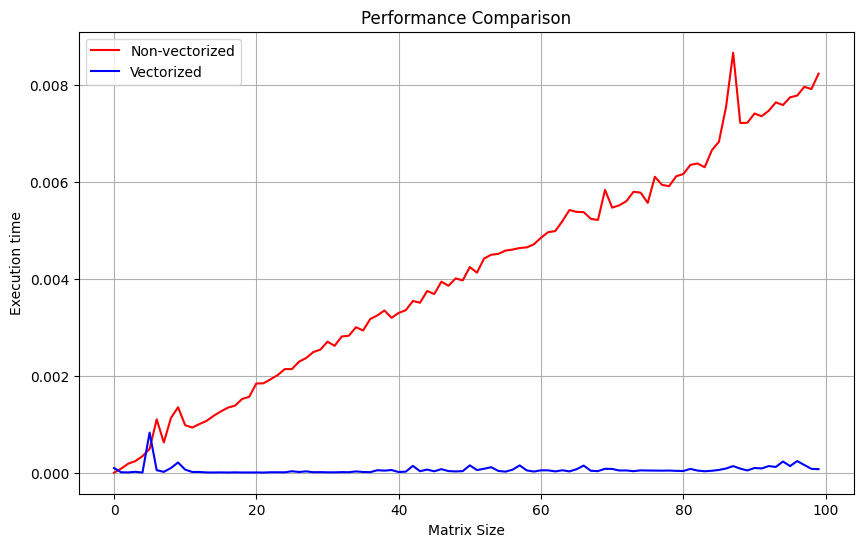

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized
%matplotlib inline
size = 100000
non_vec = []
vec = []

for ms in range(1, size+1, 1000):
    testx = np.random.rand(ms)
   
    time_beg = time.time()

    f1 = functions.max_after_zero
    f2 = functions_vectorized.max_after_zero
    
    time_beg = time.time()
    f1(testx)
    time_end = time.time()
    non_vec.append(time_end - time_beg)

    time_beg = time.time()
    f2(testx)
    time_end = time.time()
    vec.append(time_end - time_beg)
plt.figure(figsize=(10, 6))

plt.plot(non_vec, label="Non-vectorized", color='red')

plt.plot(vec, label="Vectorized", color='blue')

plt.xlabel("Matrix Size")
plt.ylabel("Execution time")
plt.title("Performance Comparison")
plt.legend()  
plt.grid(True)  


plt.show()


 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


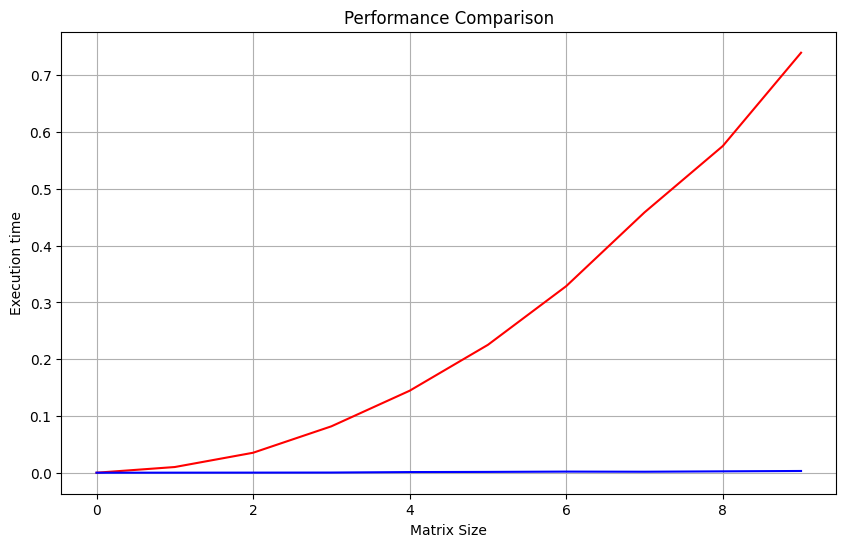

In [53]:
import matplotlib.pyplot as plt

import numpy as np
import time
import functions
import functions_vectorized
%matplotlib inline
size = 1000
non_vec = []
vec = []

for ms in range(1, size+1, 100):
    testx = np.random.rand(ms, ms, 3)
    testy = np.random.rand(3)
    

    f1 = functions.convert_image
    f2 = functions_vectorized.convert_image
    

    time_beg = time.time()
    f1(testx,  testy)
    time_end = time.time()
    non_vec.append(time_end - time_beg)

    time_beg = time.time()
    f2(testx, testy)
    time_end = time.time()
    vec.append(time_end - time_beg)
plt.figure(figsize=(10, 6))

plt.plot(non_vec, label="Non-vectorized", color='red')

plt.plot(vec, label="Vectorized", color='blue')

plt.xlabel("Matrix Size")
plt.ylabel("Execution time")
plt.title("Performance Comparison")
 
plt.grid(True)  


plt.show()


Text(0.5, 1.0, 'Vectorized')

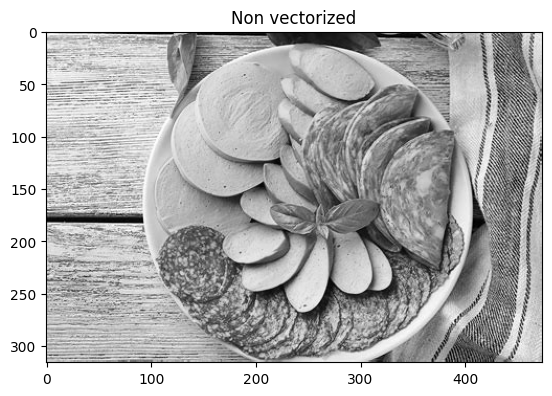

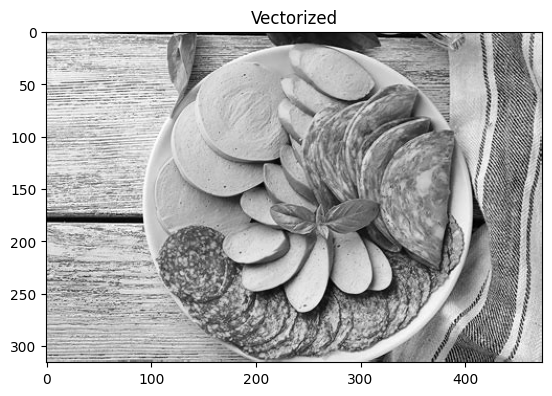

In [54]:
from PIL import Image
from matplotlib.pyplot import imshow, title
pict = np.asarray(Image.open("th-81163342.jpg"))

res_non_vec = Image.fromarray(np.array(functions.convert_image(pict, [0.299, 0.587, 0.114]), 'L'))
res_vec = Image.fromarray(np.array(functions_vectorized.convert_image(pict, [0.299, 0.587, 0.114]), 'L'))
 

plt.figure()

plt.imshow(res_non_vec)
plt.title( "Non vectorized")
plt.figure()

plt.imshow(res_vec, label = "Vectorized")
plt.title( "Vectorized")


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

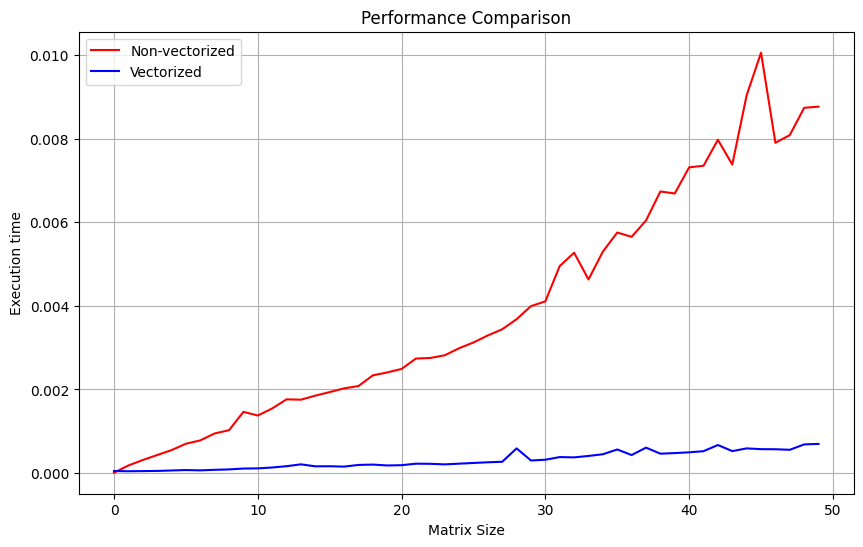

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import time
import functions
import functions_vectorized
%matplotlib inline
size = 50000
non_vec = []
vec = []

for ms in range(1, size+1, 1000):
    testx = np.random.randint(ms, size=ms)

    time_beg = time.time()

    f1 = functions.run_length_encoding
    f2 = functions_vectorized.run_length_encoding
    
    time_beg = time.time()
    f1(testx)
    time_end = time.time()
    non_vec.append(time_end - time_beg)

    time_beg = time.time()
    f2(testx)
    time_end = time.time()
    vec.append(time_end - time_beg)
plt.figure(figsize=(10, 6))

plt.plot( non_vec, label="Non-vectorized", color='red')

plt.plot( vec, label="Vectorized", color='blue')

plt.xlabel("Matrix Size")
plt.ylabel("Execution time")
plt.title("Performance Comparison")
plt.legend()  
plt.grid(True)  


plt.show()


 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

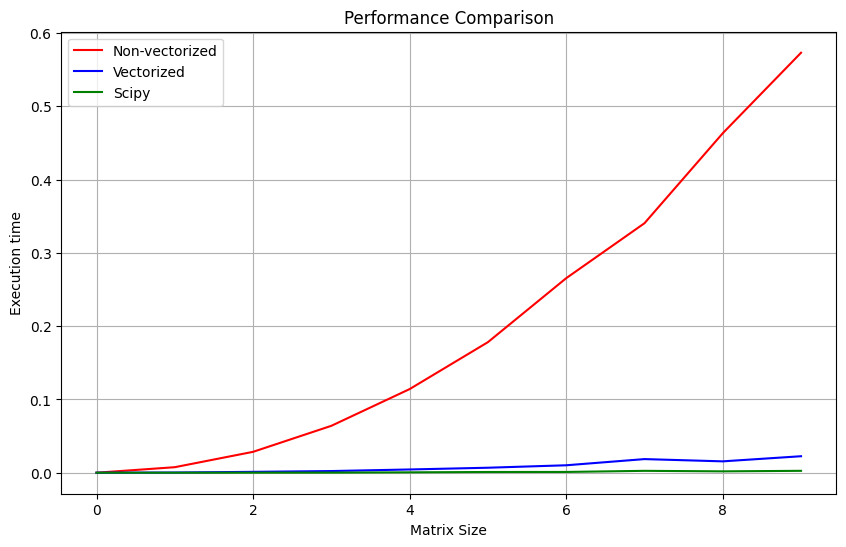

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import time

import scipy.spatial
import functions
import functions_vectorized

%matplotlib inline
size = 1000
non_vec = []
vec = []
scp = []
for ms in range(1, size+1, 100):
    testx = np.random.rand(ms, 2)
    testy = np.random.rand(ms, 2)
    time_beg = time.time()

    f1 = functions.pairwise_distance
    f2 = functions_vectorized.pairwise_distance
    f3 = scipy.spatial.distance.cdist
    time_beg = time.time()
    f1(testx,  testy)
    time_end = time.time()
    non_vec.append(time_end - time_beg)

    time_beg = time.time()
    f2(testx,  testy)
    time_end = time.time()
    vec.append(time_end - time_beg)

    time_beg = time.time()
    f3(testx,  testy)
    time_end = time.time()
    scp.append(time_end - time_beg)
plt.figure(figsize=(10, 6))

plt.plot( non_vec, label="Non-vectorized", color='red')

plt.plot( vec, label="Vectorized", color='blue')
plt.plot( scp, label="Scipy", color='green')
plt.xlabel("Matrix Size")
plt.ylabel("Execution time")
plt.title("Performance Comparison")
plt.legend()  
plt.grid(True)  


plt.show()


### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

- **Ульра отчет**
    - 'Ну прикольно нампай быстрее'
    - $ ну там кода \space \cdot \space мало$
##### функции прикольные быстро всё
~~оказалось, что питон круче плюсов~~
> Кто рано встает, тот меньше спит.
>> Ты на физику не смотри, у меня по физкультуре пять.
>>> тарелку после гречки нужно мыть сразу.
>>>> Вы не сможете сказать ничего кроме слов.
```cpp 
typedef tree<int, null_type, less<int>, rb_tree_tag, tree_order_statistics_node_update> ordered_set;
```
| ПИТОН | НУМПИ |
|-------|-------|
| 239179мс | 52мс |

![мяу](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2Ff6%2Fea%2F25%2Ff6ea255cf3231967284793053b2f34c2.jpg&f=1&nofb=1&ipt=108f87db66e5b89079495b439f71b4db5de7b1eb4b39cfaa853e0a8fc5f4b5ba&ipo=images)